# Mean HNMR spectrum per dietary group

In [30]:
from matplotlib import pyplot as plt

from massholes.loader import loader

In [31]:
hnmr_spectra = loader('../data/rats-and-onions.xls')
hnmr_spectra, target = hnmr_spectra.drop(columns=['treatment']).set_index('index').T, hnmr_spectra['treatment']
hnmr_spectra

index,'H2-12-','H4-31','H4-26','H3-22','H3-18','H1-4-','H3-23','H2-13','H3-21','H2-15','H3-19','H2-10','H1-3-','H3-24','H4-28','H2-16','H4-28'.1,'H2-11','H3-17','H2-9-','H1-6-','H1-1-','H1-2-','H1-5-','H2-14','H4-32','H1-8-','H4-30-','H1-7-','H4-27','H4-29'
Delta/sample,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9.610344,-28.513780,-52.448327,-23.500000,-26.544199,-55.279156,-35.207816,-35.930118,-27.230263,-145.015509,-38.582873,-53.986220,-71.831140,-15.070175,11.448511,-3.829102,-50.148868,-10.070521,-36.263174,-20.753453,-27.017207,-6.839654,-21.653880,-45.941569,-24.025647,-65.961914,-11.878906,-58.418860,-31.238004,-13.412983,10.911186,-6.325170
9.610039,-28.954232,-49.399606,-21.960938,-25.386740,-58.067618,-37.955955,-36.678150,-31.828947,-145.539702,-36.204420,-54.463583,-72.859649,-18.070175,14.178040,-8.428711,-50.565945,-8.773249,-37.496125,-45.221685,-29.507891,-5.580338,-22.597545,-38.016119,-26.693336,-63.416992,-5.317383,-58.347588,-28.809363,-16.131906,14.418928,-5.288283
9.609733,-31.200787,-48.361220,-21.128906,-23.991713,-61.355459,-40.201613,-37.549213,-34.278509,-147.047146,-33.707182,-55.639764,-73.451754,-19.377193,16.206576,-12.470703,-51.172490,-8.068041,-38.261004,-61.948895,-40.092613,-5.807760,-25.307979,-30.963267,-31.000658,-60.100586,-8.684570,-56.780702,-26.809793,-20.126381,16.627523,-2.619343
9.609427,-34.542323,-49.719488,-20.882812,-22.911602,-65.296216,-41.370968,-38.390748,-35.140351,-149.435484,-30.776243,-57.017717,-74.456140,-18.951754,17.223945,-15.474609,-51.797490,-8.623683,-38.536888,-63.985497,-38.591078,-7.724682,-29.772578,-26.112833,-35.842832,-57.005859,-10.528320,-54.250000,-25.505659,-23.735497,17.504784,1.188779
9.609122,-37.760827,-52.706693,-21.105469,-22.190608,-69.508375,-41.253102,-39.424213,-35.083333,-152.924938,-27.527624,-58.149606,-76.456140,-17.087719,17.140199,-17.094727,-52.296383,-10.445598,-38.717452,-51.633287,-32.787703,-11.131083,-35.337023,-24.266894,-40.272907,-54.113281,-5.323242,-51.385965,-24.713337,-26.269337,17.766614,4.713267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.321970,-7.404035,15.027067,43.285156,99.773481,12.816377,-4.900744,11.264764,13.631579,-10.037221,11.544199,51.545276,-5.530702,-17.114035,-19.178040,-14.287109,-37.587968,-17.670490,-37.920800,-53.104972,60.738163,40.987505,0.977093,39.545102,45.866944,21.614258,41.278320,-33.745614,-11.175566,31.175414,14.023138,65.517669
0.321665,-9.015748,20.196850,45.410156,103.842541,15.811104,-7.620968,12.042323,15.059211,-11.947891,9.593923,52.997047,-2.521930,-15.482456,-18.408809,-18.733398,-32.009719,-19.710167,-41.525883,-76.570442,65.269071,39.655853,3.455721,37.902976,47.596449,24.952148,40.588867,-33.463816,-5.759412,31.159530,17.368650,63.849969
0.321359,-13.240650,22.842028,47.968750,106.709945,17.758995,-9.795285,11.902067,18.401316,-14.835608,7.071823,54.404528,0.335526,-13.846491,-17.003722,-24.204102,-26.163878,-22.131897,-44.749690,-105.037293,64.862999,38.158154,6.573871,35.584315,47.830995,26.762695,43.147461,-31.870614,-0.111344,33.511050,19.617693,63.168010


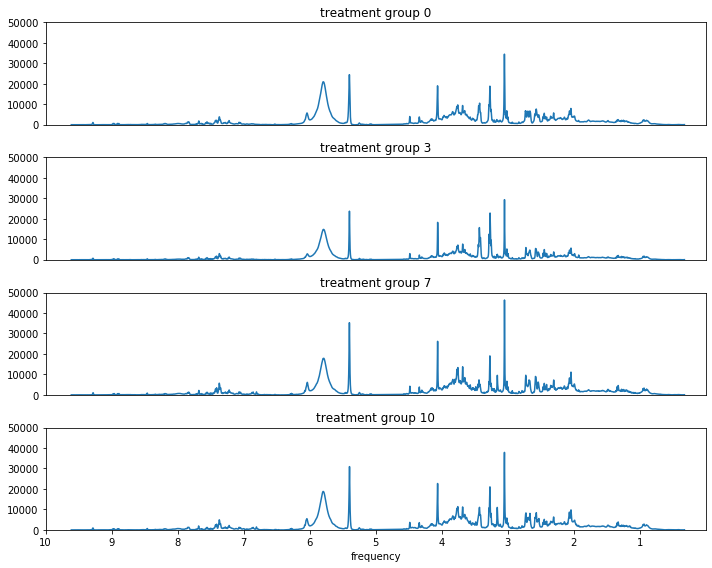

In [53]:
treatment_groups = (
    hnmr_spectra
    .T
    .groupby(target.values)
)

fig, axes = plt.subplots(len(treatment_groups), figsize=(10, 8))

for idx, (treatment, treatment_group) in enumerate(treatment_groups):
    ax = axes[idx]
    (
        treatment_group
        .mean()
        .plot(label='', ax=ax)
    )
    ax.set_xlim([10, 0])
    ax.set_ylim([0, 50_000])
    ax.set_xticks([])
    ax.set_xlabel('')
    ax.set_title(f'treatment group {treatment}')
    
axes[-1].set_xticks(list(range(10, 0, -1)))
axes[-1].set_xlabel('frequency')

fig.tight_layout()